In [2]:
import pandas as pd
import numpy as np
import warnings
import math
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
combined = pd.read_csv("combined_result.csv") #input csv to classify faulty and good transcripts

# Classification Using Logistic Regression 

In [18]:
train_x, test_x, train_y, test_y = train_test_split(combined[['EffectiveLength','NumReads','mean','Length','TPM','std']],
    combined['faulty'], train_size=0.7)

In [19]:
result =  pd.DataFrame()
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(train_x, train_y)
print(model)
# make predictions
expected = test_y
predicted = model.predict(test_x)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("MSE : ",mean_squared_error(expected,predicted))
print("Accuracy : ",metrics.accuracy_score(expected,predicted, normalize=False))
print("Accuracy : ",metrics.accuracy_score(expected,predicted))
result['expected'] = expected
result['LR'] = predicted

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.71      0.93      0.81      4201
          1       0.88      0.59      0.71      3866

avg / total       0.79      0.77      0.76      8067

[[3894  307]
 [1578 2288]]
('MSE : ', 0.23366803024668403)
('Accuracy : ', 6182)
('Accuracy : ', 0.76633196975331597)


# Regression Models trained on dataset predicting adjusted standard deviation for faulty transcripts 

In [82]:
good = pd.read_csv("good_prop.csv")
faulty = pd.read_csv("faulty_prop.csv")

In [83]:
rcount_df = pd.read_csv("num_times.csv")
tcount_df = pd.read_csv("tcount_new.csv")

In [84]:
combined_df = pd.read_csv('combined_result.csv')
#combined_df = combined_df.reset_index
combined_df.drop('Unnamed: 0', axis=1, inplace=True)
updated_combined  = pd.merge(combined_df,rcount_df,on='transcript_id', how='inner')

updated_combined  = pd.merge(updated_combined,tcount_df,on='transcript_id', how='inner')
updated_combined['diff'] = updated_combined['count']-updated_combined['mean']
#updated_combined.columns

updated_combined['eq_param'] = updated_combined['tcount']/updated_combined['times']

updated_combined.dropna(inplace=True)
updated_combined

,EffectiveLength,Length,transcript_id,NumReads,TPM,count,deviation,faulty,mean,std,times,tcount,diff,eq_param
0,1952.991,2152,ENST00000414083,0.000000,0.0,90,3.373456e+10,1,1.891215e-10,2.667887e-09,5,21,90.000000,4.200000
2,1805.991,2005,ENST00000368236,0.000000,0.0,50,9.409786e+09,1,1.092961e-09,5.313617e-09,1,2,50.000000,2.000000
3,4529.991,4729,ENST00000543253,0.000000,0.0,16,6.299056e+09,1,4.031062e-10,2.540063e-09,2,5,16.000000,2.500000
4,5934.991,6134,ENST00000370187,0.000000,0.0,78,3.377698e+09,1,1.636995e-09,2.309265e-08,2,7,78.000000,3.500000
5,5780.991,5980,ENST00000537097,0.000000,0.0,19,2.066195e+09,1,1.468580e-09,9.195648e-09,2,5,19.000000,2.500000
6,1782.991,1982,ENST00000334497,0.000000,0.0,6,1.901359e+09,1,2.236972e-10,3.155637e-09,8,54,6.000000,6.750000
7,2127.991,2327,ENST00000556994,0.000000,0.0,39,1.821521e+09,1,6.012765e-09,2.141068e-08,8,28,39.000000,3.500000
8,5203.991,5403,ENST00000373658,0.000000,0.0,16,1.421882e+09,1,2.950192e-09,1.125270e-08,4,40,16.000000,10.000000
9,976.991,1176,ENST00000373723,0.000000,0.0,5,1.230760e+09,1,2.879851e-10,4.062530e-09,3,16,5.000000,5.333333
10,4635.991,4835,ENST00000338121,0.000000,0.0,16,1.152955e+09,1,3.886550e-09,1.387738e-08,5,18,16.000000,3.600000


In [55]:
train_x, test_x, train_y, test_y = train_test_split(updated_combined[['transcript_id','EffectiveLength','NumReads','Length','TPM','eq_param','mean','faulty','count']],
    updated_combined['diff'], train_size=0.7)


In [85]:
train_x = updated_combined[['transcript_id','EffectiveLength','NumReads','Length','TPM','eq_param','mean','faulty','count']]
train_y = updated_combined['diff']

test_x = updated_combined[updated_combined['faulty']==1][['transcript_id','EffectiveLength','NumReads','Length','TPM','eq_param','mean','faulty','count']]

test_y = updated_combined[updated_combined['faulty']==1]['diff']

In [64]:
test_y.reset_index(drop=True, inplace=True)

In [86]:
#Linear Regression
lm = LinearRegression()
lm.fit(train_x.drop(['transcript_id','count'],axis=1), train_y)
lr_predict = lm.predict(test_x.drop(['transcript_id','count'],axis=1))
mse = np.mean((lr_predict - test_y)**2)
print mse

1943949.10932


In [87]:
#Ridge Regression
ridge = Ridge(alpha=0.5, normalize=False)
ridge.fit(train_x.drop(['transcript_id','count'],axis=1),train_y)
ridge_predict = ridge.predict(test_x.drop(['transcript_id','count'],axis=1))
mse = np.mean((ridge_predict - test_y)**2)
print mse

1943949.12853


In [88]:
#Lasso Regression
lasso =  Lasso(alpha=0.3, normalize=False)
lasso.fit(train_x.drop(['transcript_id','count'],axis=1),train_y)
lasso_predict = lasso.predict(test_x.drop(['transcript_id','count'],axis=1))
mse = np.mean((lasso_predict - test_y)**2)
print mse

1943957.5328


In [89]:
res = pd.DataFrame({'predict':lr_predict, 'original':test_y})
res
temp = test_x.reset_index(drop=True)
temp['predict_diff'] = lr_predict
#updated_combined['predict_diff'] = ridge_predict
temp['diff'] =  test_y
temp

,transcript_id,EffectiveLength,NumReads,Length,TPM,eq_param,mean,faulty,count,predict_diff,diff
0,ENST00000414083,1952.991,0.000000,2152,0.000000,4.200000,1.891215e-10,1,90,119.875037,90.000000
1,ENST00000368236,1805.991,0.000000,2005,0.000000,2.000000,1.092961e-09,1,50,113.362407,NaN
2,ENST00000543253,4529.991,0.000000,4729,0.000000,2.500000,4.031062e-10,1,16,88.077387,50.000000
3,ENST00000370187,5934.991,0.000000,6134,0.000000,3.500000,1.636995e-09,1,78,77.725856,16.000000
4,ENST00000537097,5780.991,0.000000,5980,0.000000,2.500000,1.468580e-09,1,19,75.632827,78.000000
5,ENST00000334497,1782.991,0.000000,1982,0.000000,6.750000,2.236972e-10,1,6,130.809825,19.000000
6,ENST00000556994,2127.991,0.000000,2327,0.000000,3.500000,6.012765e-09,1,39,115.596710,6.000000
7,ENST00000373658,5203.991,0.000000,5403,0.000000,10.000000,2.950192e-09,1,16,108.559941,39.000000
8,ENST00000373723,976.991,0.000000,1176,0.000000,5.333333,2.879851e-10,1,5,133.692285,16.000000
9,ENST00000338121,4635.991,0.000000,4835,0.000000,3.600000,3.886550e-09,1,16,91.010402,5.000000


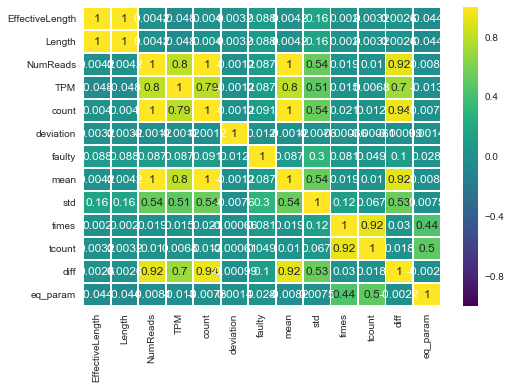

In [17]:
r = updated_combined.corr()
#print r
sns.heatmap(r, fmt=".2g", annot=True, cmap="viridis", linewidths=.8)
plt.show()

In [90]:
df_quantboot = pd.read_csv("quant_bootstraps.tsv", sep='\t')
#print df_quantboot
#temp['count'][7]

In [91]:
import numpy as np
#df_polytruth['std']=0
temp['new_std']=0
temp['new_mean']=0
temp['new_deviation']=0
#print temp
for index,row in temp.iterrows():
    #print index
    #try:
        #print index
        #temp['new_mean'][index]
        df_quantboot[row['transcript_id']] = df_quantboot[row['transcript_id']]+row['predict_diff']
        
        temp['new_mean'][index] = df_quantboot[row['transcript_id']].mean()
        #temp[row['transcript_id']==df_quantboot[row['transcript_id']]]['new_mean'] = df_quantboot[row['transcript_id']].mean()
        temp['new_std'][index] = df_quantboot[row['transcript_id']].std()
        temp['new_deviation'][index] = (temp['count'][index]-temp['new_mean'][index])//temp['new_std'][index]
        #print (row['count']-row['new_mean'])//row['new_std']
    #except:
        #print index,
     #   pass

temp=temp.sort_values('new_deviation', ascending=False)
#print temp
df_faulty_new = temp[(temp['new_deviation']>2) | (temp['new_deviation'] < -2)]
    
df_good_new = temp[(temp['new_deviation']<= 2) & (temp['new_deviation'] >= -2)]

#temp.head(10)
df_faulty_new.to_csv("updated_faulty.csv")
df_good_new.to_csv("updated_good.csv")
temp
#df_quantboot

,transcript_id,EffectiveLength,NumReads,Length,TPM,eq_param,mean,faulty,count,predict_diff,diff,new_std,new_mean,new_deviation
119,ENST00000426651,857.991,114323.508389,1057,4100.586674,2.000000,114316.274150,1,154462,18436.810948,164427.613302,318,132753,68
115,ENST00000367058,3863.991,0.001592,4063,0.000013,2.750000,0.207381,1,162,95.491482,24.967054,1,95,67
129,ENST00000359141,3820.991,9.991770,4020,0.080475,4.500000,7.710593,1,243,105.476674,-57221.321454,2,113,65
106,ENST00000331789,1717.991,639856.884579,1917,11461.859022,3.250000,639769.386698,1,804197,110610.101659,550.988264,846,750379,63
162,ENST00000369202,15490.991,180.468116,15690,0.358521,12.938462,177.546158,1,1141,51.691103,19669.220121,15,229,60
156,ENST00000576730,2779.991,66.889073,2979,0.740466,6.411765,56.291667,1,821,137.584119,18370.682664,11,193,57
121,ENST00000598742,2159.991,145304.797361,2359,2070.241899,4.000000,145341.352588,1,193265,25545.434512,2.998860,399,170886,56
118,ENST00000219235,2729.991,188231.000000,2929,2121.890666,2.500000,188292.200000,1,245467,33426.599210,5.958867,438,221718,54
164,ENST00000342960,10497.991,1088.503485,10697,3.190925,12.920213,1091.715829,1,3372,263.828864,17589.875000,38,1355,53
154,ENST00000434333,663.998,20889.848721,863,968.191824,1.500000,20887.137957,1,33942,3318.425470,50063.270000,192,24205,50


In [69]:
temp.to_csv("final.csv")

In [93]:
df_faulty_new.shape

(8136, 14)

In [94]:
df_quantboot.to_csv("updated_quantboot.csv")